In [3]:
import numpy as np
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid

import matplotlib.pyplot as plt
from glob import glob
import os

import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

%matplotlib inline

In [8]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,Vmin=None,Vmax=None,
          clabel = r'log$_{10}$ SB (photons/cm$^2$/s/sr)'):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest',vmin=Vmin,vmax=Vmax)

    if labelaxes:
        fontsize=13
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
       # ax.xaxis.set_label_position('top') 
       # ax.xaxis.tick_top()
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
        cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
        cbar.ax.xaxis.set_label_position('top') 
        cbar.ax.xaxis.tick_top()
       # cax = div.append_axes("right",size="5%",pad=0.1)
       # cbar = plt.colorbar(img, cax=cax,orientation='vertical')        
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white',fontsize=9)


In [4]:
machine = 'chinook'

In [11]:
if machine == 'chinook':
    tempdir = '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/temp'
    densdir = '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens'
    fixedmetdir = '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet'
    o3dir = '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3'
else:
    print 'Data only available on chinook!'

### Temperature

In [6]:
global temp_25mpc
## load the temp
temp_25Mpc_fname = tempdir+'/temp_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_total_wiSFR.npz'
if os.path.isfile(temp_25Mpc_fname):
    temp_25mpc = np.load(temp_25Mpc_fname)['arr_0']
elif machine=='chinook':
    temp_25mpc_files = glob(tempdir+'/temp_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*wiSFR.npz')
    print temp_25mpc_files
    temp_25mpc = np.load(temp_25mpc_files[0])['arr_0']
    for filename in temp_25mpc_files[1:]:
        print 'adding: '+filename
        temp_25mpc = np.log10(10**temp_25mpc + 10**(np.load(filename)['arr_0']))
    np.savez(temp_25Mpc_fname,temp_25mpc)
else:
    print temp_25Mpc_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


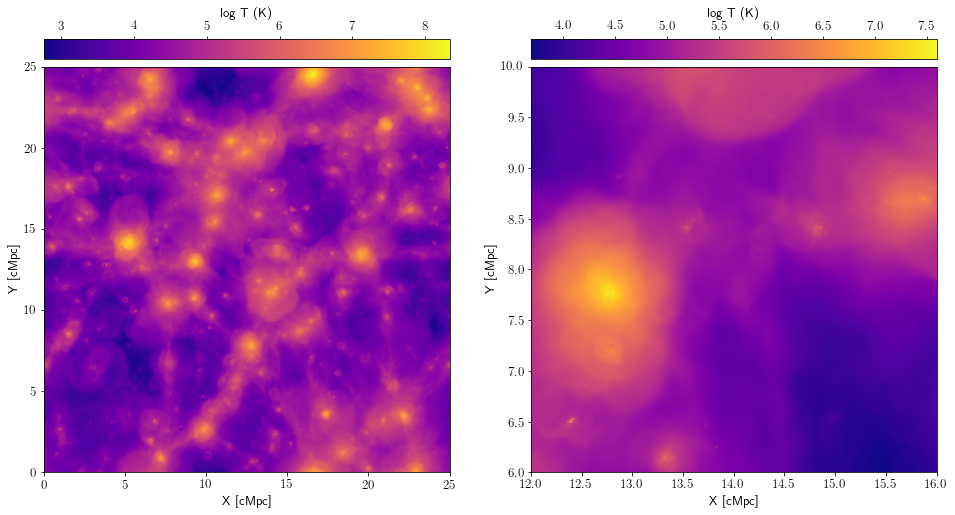

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,16))

Vmin=-4; Vmax=3
Vmin=None; Vmax=None
xystarts = [0,0]
xyextent = [25.,25.]

pltimg(temp_25mpc,ax1,xystarts,xyextent,label=None,colmap = 'plasma',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel='log T (K)')

pixsize = temp_25mpc.shape[0]; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]
subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(temp_25mpc[subset[0]:subset[1],subset[2]:subset[3]],
       ax2,xystarts,xyextent,label=None,colmap = 'plasma',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel='log T (K)')


### Density

In [19]:
global dens_25Mpc
## load the temp
dens_25Mpc_fname = densdir+'/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_total_wiSFR.npz'
if os.path.isfile(dens_25Mpc_fname):
    dens_25Mpc = np.load(dens_25Mpc_fname)['arr_0']
elif machine=='chinook':
    dens_25mpc_files = glob(densdir+'/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*wiSFR.npz')
    print dens_25mpc_files
    dens_25Mpc = np.load(dens_25mpc_files[0])['arr_0']
    for filename in dens_25mpc_files[1:]:
        print 'adding: '+filename
        dens_25Mpc = np.log10(10**dens_25Mpc + 10**(np.load(filename)['arr_0']))
    np.savez(dens_25Mpc_fname,dens_25Mpc)
else:
    print dens_25Mpc_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'


['/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen0.625_wiSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen1.875_wiSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_wiSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_wiSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_wiSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.375_wiSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen15.625_wiSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/d

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_wiSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_wiSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_wiSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.375_wiSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen15.625_wiSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen16.875_wiSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/dens/density_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen18.125_wiSFR.npz
adding: /User

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


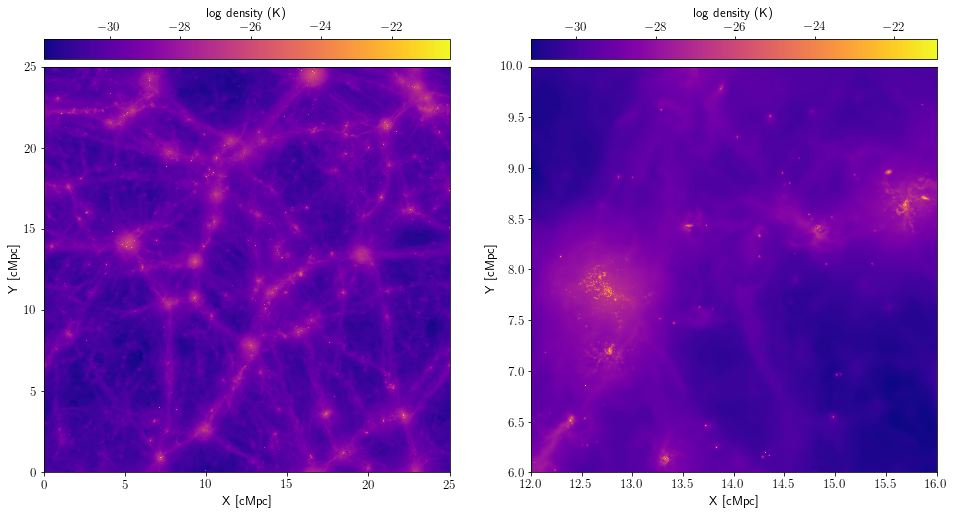

In [21]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,16))

#Vmin=-4; Vmax=3
Vmin=None; Vmax=None
xystarts = [0,0]
xyextent = [25.,25.]

pltimg(dens_25Mpc,ax1,xystarts,xyextent,label=None,colmap = 'plasma',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel='log density ()')

pixsize = dens_25Mpc.shape[0]; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]
subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(dens_25Mpc[subset[0]:subset[1],subset[2]:subset[3]],
       ax2,xystarts,xyextent,label=None,colmap = 'plasma',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel='log density ()')


### Fixed metallicity - at 0.1 solar

In [7]:
global fixedmet
## load the temp
fixedmet_fname = fixedmetdir+'/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_noSFR_fixedmet_total.npz'
if os.path.isfile(fixedmet_fname):
    fixedmet = np.load(fixedmet_fname)['arr_0']
elif machine=='chinook':
    fixedmet_files = glob(fixedmetdir+'/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*noSFR_fixedmet.npz')
    print fixedmet_files
    fixedmet = np.load(fixedmet_files[0])['arr_0']
    for filename in fixedmet_files[1:]:
        print 'adding: '+filename
        fixedmet = np.log10(10**fixedmet + 10**(np.load(filename)['arr_0']))
    np.savez(fixedmet_fname,fixedmet)
else:
    print fixedmet_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'


['/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen0.625_noSFR_fixedmet.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen1.875_noSFR_fixedmet.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_noSFR_fixedmet.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_noSFR_fixedmet.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_noSFR_fixedmet.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.375_noSFR_fixedmet.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet/emiss

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_noSFR_fixedmet.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_noSFR_fixedmet.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_noSFR_fixedmet.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.375_noSFR_fixedmet.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen15.625_noSFR_fixedmet.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_fixedmet/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen16.875_noSFR_fixedmet.npz
adding: /Users/lokhorst/Data/EAGLE

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


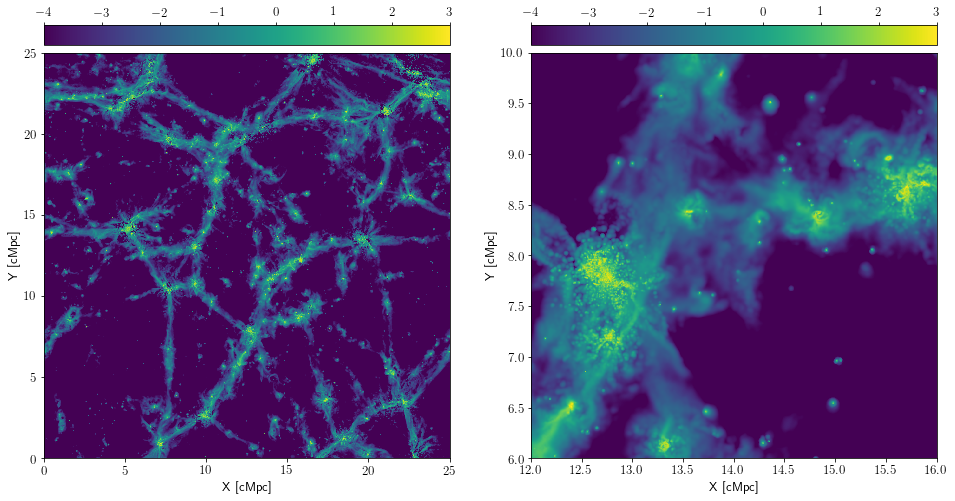

In [22]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,16))

Vmin=-4; Vmax=3
#Vmin=None; Vmax=None
xystarts = [0,0]
xyextent = [25.,25.]

pltimg(fixedmet,ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel='')

pixsize = fixedmet.shape[0]; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]
subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(fixedmet[subset[0]:subset[1],subset[2]:subset[3]],
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel='')


### Simulation Metallicity

In [12]:
global o3
## load the temp
o3_fname = o3dir+'/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_noSFR_total.npz'
if os.path.isfile(o3_fname):
    o3 = np.load(o3_fname)['arr_0']
elif machine=='chinook':
    o3dir_files = glob(o3dir+'/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*noSFR.npz')
    print o3dir_files
    o3 = np.load(o3dir_files[0])['arr_0']
    for filename in o3dir_files[1:]:
        print 'adding: '+filename
        o3 = np.log10(10**o3 + 10**(np.load(filename)['arr_0']))
    np.savez(o3_fname,o3)
else:
    print o3_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'


['/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen0.625_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen1.875_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.375_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen15.625_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagara

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.375_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen15.625_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen16.875_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen18.125_noSFR.npz

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


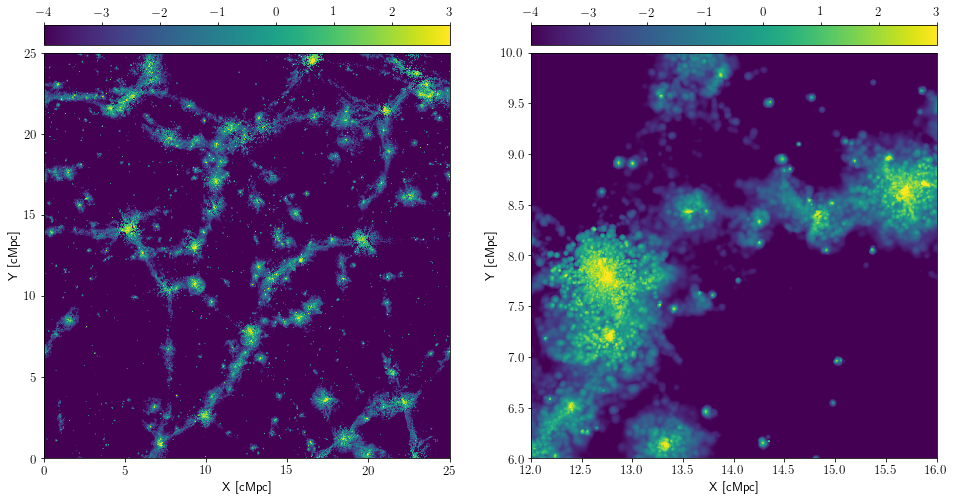

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,16))

Vmin=-4; Vmax=3
#Vmin=None; Vmax=None
xystarts = [0,0]
xyextent = [25.,25.]

pltimg(o3,ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel='')

pixsize = o3.shape[0]; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]
subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(o3[subset[0]:subset[1],subset[2]:subset[3]],
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel='')


### compare metallicities

(8000, 8000)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


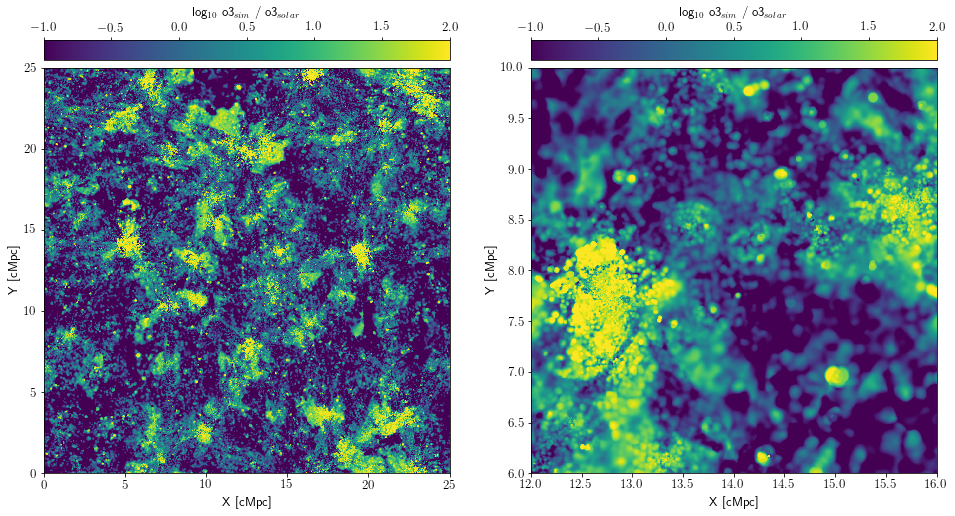

In [30]:
ratio_sim_solar = o3 - (fixedmet - 1.)  # subtract because in log space
print ratio_sim_solar.shape

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,16))

Vmin=None; Vmax=None
Vmin=-1; Vmax=2
xystarts = [0,0]
xyextent = [25.,25.]

pltimg(ratio_sim_solar,ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel=r'log$_{10}$ o3$_{sim}$ / o3$_{solar}$')

pixsize = ratio_sim_solar.shape[0]; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]
subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(ratio_sim_solar[subset[0]:subset[1],subset[2]:subset[3]],
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel=r'log$_{10}$ o3$_{sim}$ / o3$_{solar}$')


### Load from backup files:

In [31]:
global o3_backup
o3backupdir = '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/'
## load the temp
o3backup_fname = o3backupdir+'/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_noSFR_backup_total.npz'
if os.path.isfile(o3backup_fname):
    o3_backup = np.load(o3backup_fname)['arr_0']
elif machine=='chinook':
    o3backupdir_files = glob(o3backupdir+'/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*noSFR.npz')
    print o3backupdir_files
    o3_backup = np.load(o3backupdir_files[0])['arr_0']
    for filename in o3backupdir_files[1:]:
        print 'adding: '+filename
        o3_backup = np.log10(10**o3_backup + 10**(np.load(filename)['arr_0']))
    np.savez(o3backup_fname,o3_backup)
else:
    print o3backup_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'


['/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen0.625_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen1.875_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.375_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen15.62

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.375_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen15.625_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen16.875_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3_backup/emission_o3_L0025N0376_28_test2_SmA

In [32]:
global halpha_backup
halphabackupdir = '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_backup/'
## load the temp
halphabackup_fname = halphabackupdir+'/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_noSFR_backup_total.npz'
if os.path.isfile(halphabackup_fname):
    halpha_backup = np.load(halphabackup_fname)['arr_0']
elif machine=='chinook':
    halphabackupdir_files = glob(halphabackupdir+'/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*noSFR.npz')
    print halphabackupdir_files
    halpha_backup = np.load(halphabackupdir_files[0])['arr_0']
    for filename in halphabackupdir_files[1:]:
        print 'adding: '+filename
        halpha_backup = np.log10(10**halpha_backup + 10**(np.load(filename)['arr_0']))
    np.savez(halphabackup_fname,halpha_backup)
else:
    print halphabackup_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'


['/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_backup/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen0.625_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_backup/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen1.875_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_backup/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_backup/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_backup/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_backup/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.375_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_backup/emission_halpha_L0025

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


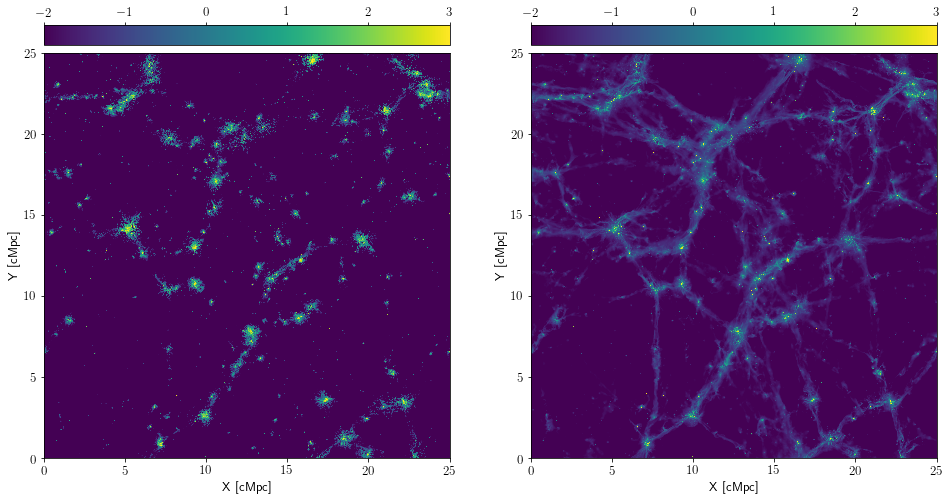

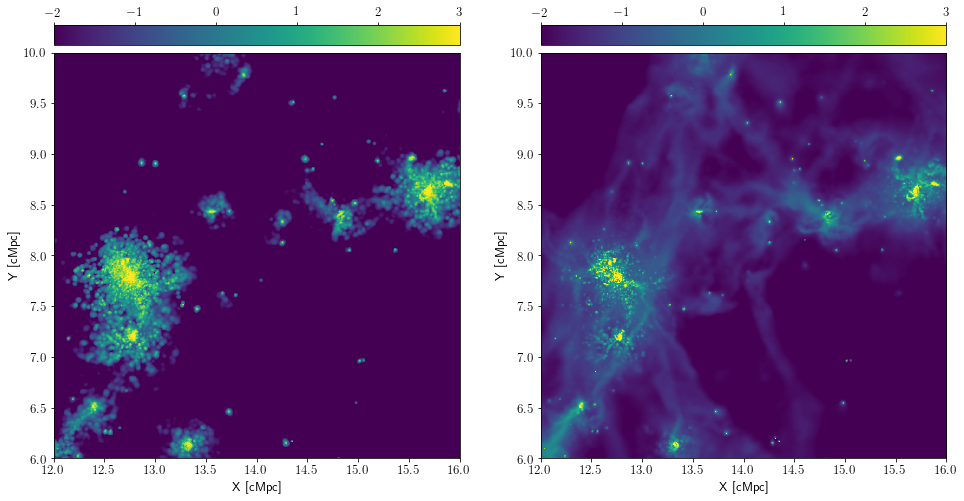

In [35]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,16))

Vmin=-2; Vmax=3
#Vmin=None; Vmax=None
xystarts = [0,0]
xyextent = [25.,25.]

pltimg(o3_backup,ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel='')
pltimg(halpha_backup,ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel='')

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,16))

pixsize = o3_backup.shape[0]; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]
subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(o3_backup[subset[0]:subset[1],subset[2]:subset[3]],
       ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel='')
pltimg(halpha_backup[subset[0]:subset[1],subset[2]:subset[3]],
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel='')


### Mass fraction projection (might be a bit weird, since summing....)

In [36]:
global o3met
o3metdir = '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/'
## load the temp
o3met_fname = o3metdir+'/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_noSFR_total.npz'
if os.path.isfile(o3met_fname):
    o3met = np.load(o3met_fname)['arr_0']
elif machine=='chinook':
    o3metdir_files = glob(o3metdir+'/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*noSFR.npz')
    print o3metdir_files
    o3met = np.load(o3metdir_files[0])['arr_0']
    for filename in o3metdir_files[1:]:
        print 'adding: '+filename
        o3met = np.log10(10**o3met + 10**(np.load(filename)['arr_0']))
    np.savez(o3met_fname,o3met)
else:
    print o3met_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'


['/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen0.625_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen1.875_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.375_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen15.625_noSFR.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.375_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen15.625_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen16.875_noSFR.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen18.125_noSFR.npz
adding: /Users/lokho

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


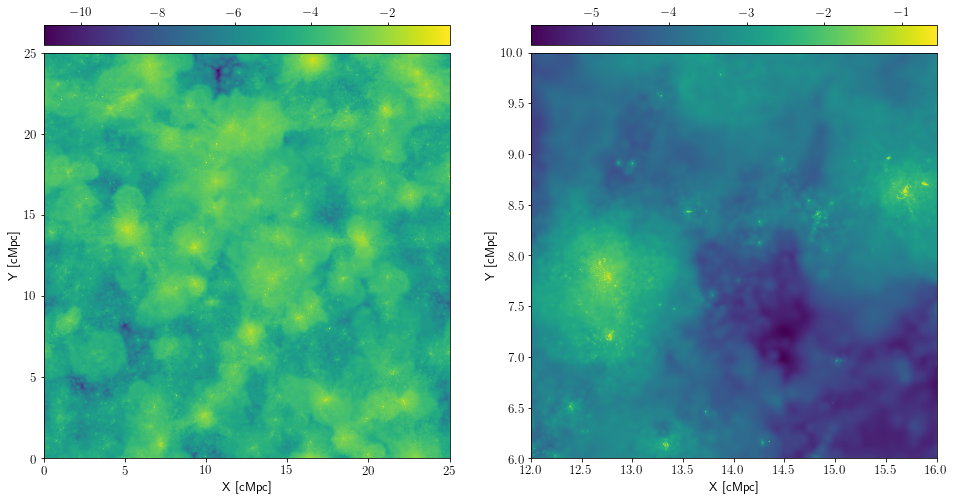

In [37]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,16))

Vmin=None; Vmax=None
#Vmin=-1; Vmax=2
xystarts = [0,0]
xyextent = [25.,25.]

pltimg(o3met,ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel=r'')

pixsize = o3met.shape[0]; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]
subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(o3met[subset[0]:subset[1],subset[2]:subset[3]],
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel=r'')


In [64]:
import eagleSqlTools as sql

def getgalvels(mySim = 'RefL0025N0376',debug=False,xmax=100,xmin=0,ymax=100,ymin=0):
    
    con   = sql.connect("dlokhorst",password="mxdPB54Y")  

    myQuery  = "SELECT \
                    SH.GalaxyID, \
                    SH.SubGroupNumber, \
                    SH.GroupNumber, \
                    SH.MassType_Star, \
                    SH.CentreOfPotential_x, \
                    SH.CentreOfPotential_y, \
                    SH.CentreOfPotential_z, \
                    SH.Velocity_x, \
                    SH.Velocity_y, \
                    SH.Velocity_z \
            FROM \
                %s_SubHalo as SH \
            WHERE \
                SH.SnapNum = 28 and \
                SH.CentreOfPotential_x <= %s and \
                SH.CentreOfPotential_x >= %s and \
                SH.CentreOfPotential_y <= %s and \
                SH.CentreOfPotential_y >= %s and \
                SH.MassType_Star > 10^9 "%(mySim,xmax,xmin,ymax,ymin)
 

                #  and \
              #  SH.StarFormationRate > 0.00001 
    if debug:
        print myQuery
    
    myData = sql.execute_query(con,myQuery)
        
    galID  = myData['GalaxyID']
    gn     = myData['GroupNumber']
    sgn     = myData['SubGroupNumber']
    xgal = myData['CentreOfPotential_x']  # cMpc
    ygal = myData['CentreOfPotential_y']   # cMpc
    zgal = myData['CentreOfPotential_z']      # cMpc
    mgal = myData['MassType_Star']      
    vxgal  = myData['Velocity_x'] # pkpc
    vygal  = myData['Velocity_y'] # pkpc
    vzgal  = myData['Velocity_z'] # pkpc
    
    return galID,gn,sgn,xgal,ygal,zgal,vxgal,vygal,vzgal,mgal

def plotgals(xgal,ygal,mgal,ax1,verbose):
    
    for i in range(len(xgal)):
        colour = 'green'
        if mgal[i]>10**8:
            colour = 'yellow'
        if mgal[i]>10**9:
            colour = 'orange'
        if mgal[i]>10**10:
            colour = 'red'
        if mgal[i]<10**9:
            continue
        circle1 = plt.Circle((xgal[i],ygal[i]), radius=mgal[i]/10**11, color=colour,fill=False)
        ax1.add_artist(circle1)
        #circle1 = plt.Circle((xgal[i],ygal[i]), radius=2, color='blue',fill=False)
        #ax1.add_artist(circle1)
        #if verbose:
        #    Mpcperpix = 0.477/1000.*(1.+0.0235) * 6.4
        #    if (rhstar[i]*5.) > (Mpcperpix*1000.) and (rhgas[i]*5.) > (Mpcperpix*1000.):
        #      #        circle1 = plt.Circle((xgal[i],ygal[i]), radius=rhstar[i]/1000.*5., color='purple',fill=False)
        #        ax1.add_artist(circle1)


In [73]:
xmax=16.;xmin=12.;ymax=10.;ymin=6.

galID,gn,sgn,xgal,ygal,zgal,vxgal,vygal,vzgal,mgal = getgalvels(mySim = 'RefL0025N0376',debug=False,xmax=xmax,xmin=xmin,ymax=ymax,ymin=ymin)

print len(galID)
print max(mgal)
print min(mgal)

233
7.49494e+10
1.02764e+06


In [77]:
condition_9andup = mgal > 10**9
ii_9andup = np.array(np.where(condition_9andup)[0]) 
xgal_9andup     = np.array(xgal[ii_9andup])
ygal_9andup     = np.array(ygal[ii_9andup])
zgal_9andup     = np.array(zgal[ii_9andup])
vxgal_9andup     = np.array(vxgal[ii_9andup])
vygal_9andup     = np.array(vygal[ii_9andup])
vzgal_9andup     = np.array(vzgal[ii_9andup])
mgal_9andup     = np.array(mgal[ii_9andup])
gn_9andup       = np.array(gn[ii_9andup])
sgn_9andup      = np.array(sgn[ii_9andup])
galID_9andup      = np.array(galID[ii_9andup])

print len(galID_9andup)

#print np.transpose([mgal_9andup,xgal_9andup,ygal_9andup,zgal_9andup,vxgal_9andup,vygal_9andup,vzgal_9andup,gn_9andup,sgn_9andup,galID_9andup])

with open("EAGLE_parameters_selectgals.txt", "w") as text_file:
    text_file.write("galID, gn, subgn, x, y, z, vx, vy, vz\n")
    for i in range(len(galID_9andup)):
    #    galID_9andup,gn_9andup,sgn_9andup,xgal_9andup,ygal_9andup,zgal_9andup,vxgal_9andup,vygal_9andup,vzgal_9andup = getgalvels(galID,mySim = 'RefL0100N1504')
    #    print galID_match,gn_match,sgn_match,xgal_match,ygal_match,zgal_match,vxgal_match,vygal_match,vzgal_match
        text_file.write("%s, %s, %s, %s, %s, %s, %s, %s, %s, %s\n"%(galID_9andup[i],gn_9andup[i],sgn_9andup[i],\
                                                                xgal_9andup[i],ygal_9andup[i],zgal_9andup[i],\
                                                                vxgal_9andup[i],vygal_9andup[i],vzgal_9andup[i],\
                                                                mgal_9andup[i]))
    for thisgn, thissgn, thisx, thisy, thisz in zip(gn_9andup,sgn_9andup,xgal_9andup,ygal_9andup,zgal_9andup):
        print("%s, %s, %s, %s, %s\n"%(thisgn,thissgn,thisx,thisy,thisz))

9
12, 1, 12.829, 7.69759, 4.9317

12, 4, 12.3498, 7.7937, 5.21271

48, 0, 15.8777, 8.7015, 24.0546

12, 0, 12.7689, 7.78359, 5.0325

287, 0, 13.2725, 7.51166, 4.84247

42, 0, 12.7745, 7.19641, 10.3288

72, 0, 13.3254, 6.13202, 2.89242

122, 0, 14.8253, 8.40201, 2.15608

37, 0, 15.6876, 8.63512, 0.315197



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


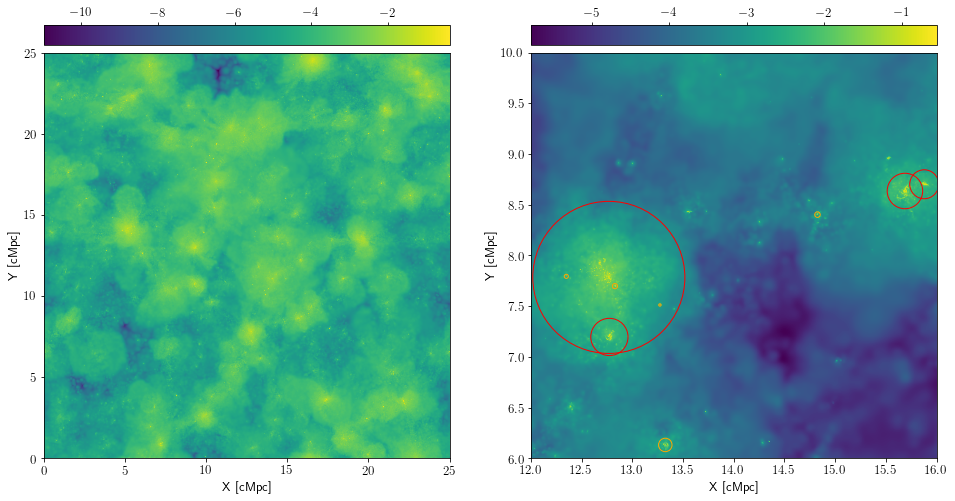

In [65]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,16))

Vmin=None; Vmax=None
#Vmin=-1; Vmax=2
xystarts = [0,0]
xyextent = [25.,25.]

pltimg(o3met,ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel=r'')

pixsize = o3met.shape[0]; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]
subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(o3met[subset[0]:subset[1],subset[2]:subset[3]],
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel=r'')
plotgals(xgal,ygal,mgal,ax2,True)

### on a roll, so let's look at the temp separated halpha emission maps

In [80]:
def loadfromniagara(o3metdir='/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/o3met/',\
                    fname='o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_noSFR_total.npz',\
                    filelike='/o3met_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*noSFR.npz'):

    o3met_fname = o3metdir+os.sep+fname
    if os.path.isfile(o3met_fname):
        o3met = np.load(o3met_fname)['arr_0']
    elif machine=='chinook':
        o3metdir_files = glob(o3metdir+filelike)
        print o3metdir_files
        o3met = np.load(o3metdir_files[0])['arr_0']
        for filename in o3metdir_files[1:]:
            print 'adding: '+filename
            o3met = np.log10(10**o3met + 10**(np.load(filename)['arr_0']))
        np.savez(o3met_fname,o3met)
    else:
        print o3met_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'
    return o3met



In [82]:
halpha_logT0to5 =loadfromniagara(o3metdir = '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT0to5',\
                fname = 'emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_total_noSFR_logT0.0_to_5.0.npz',\
                filelike='/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_*_noSFR_logT0.0_to_5.0.npz')


['/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT0to5/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen0.625_noSFR_logT0.0_to_5.0.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT0to5/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen1.875_noSFR_logT0.0_to_5.0.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT0to5/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_noSFR_logT0.0_to_5.0.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT0to5/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_noSFR_logT0.0_to_5.0.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT0to5/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_noSFR_logT0.0_to_5.0.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT0to5/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.375_noSFR_lo

In [86]:
halpha_logT5to10 =loadfromniagara(o3metdir = '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT5to10',\
                fname = 'emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_total_noSFR_logT5.0_to_10.0.npz',\
                filelike='/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_*_noSFR_logT5.0_to_10.0.npz')


['/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT5to10/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen0.625_noSFR_logT5.0_to_10.0.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT5to10/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen1.875_noSFR_logT5.0_to_10.0.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT5to10/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_noSFR_logT5.0_to_10.0.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT5to10/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_noSFR_logT5.0_to_10.0.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT5to10/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_noSFR_logT5.0_to_10.0.npz', '/Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT5to10/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.3

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT5to10/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen10.625_noSFR_logT5.0_to_10.0.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT5to10/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen11.875_noSFR_logT5.0_to_10.0.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT5to10/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen13.125_noSFR_logT5.0_to_10.0.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT5to10/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen14.375_noSFR_logT5.0_to_10.0.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT5to10/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_zcen15.625_noSFR_logT5.0_to_10.0.npz
adding: /Users/lokhorst/Data/EAGLE/Niagaraoutput/eagle/halpha_logT5to10/emission_halpha_L0025N0376_28_test2_SmAb_C2

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


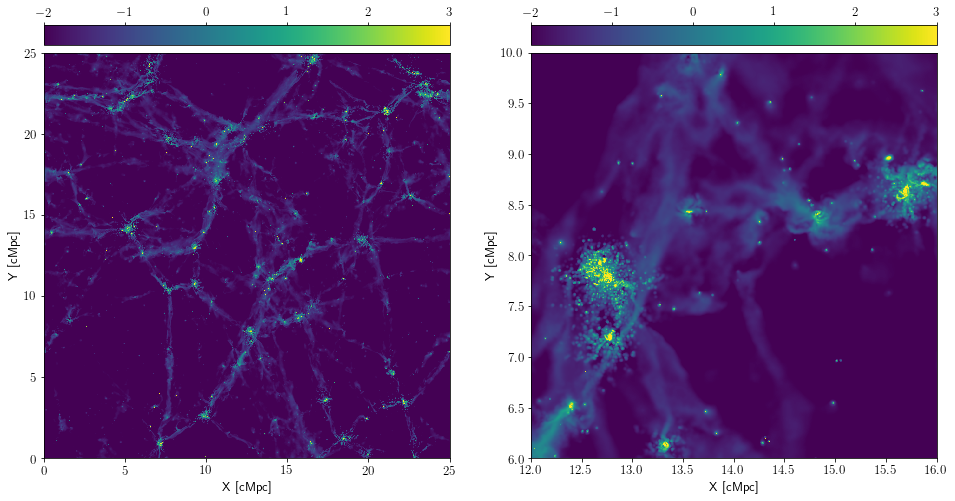

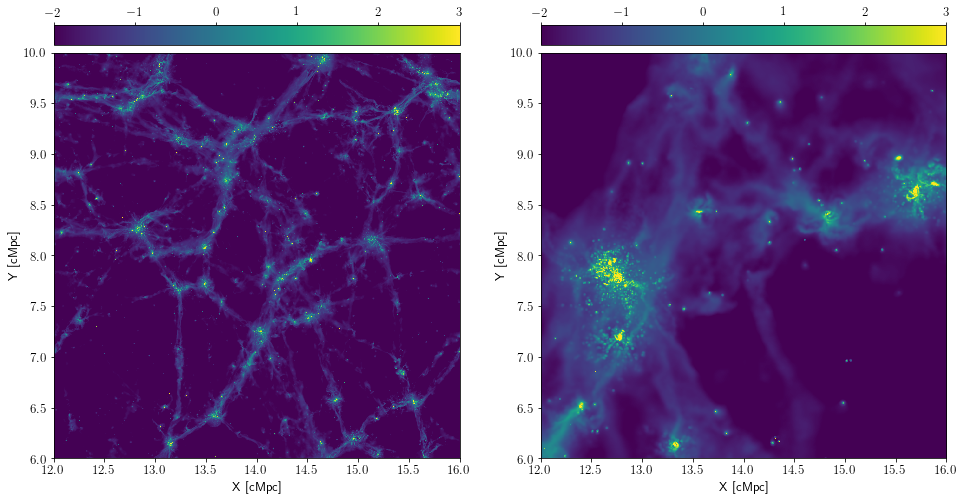

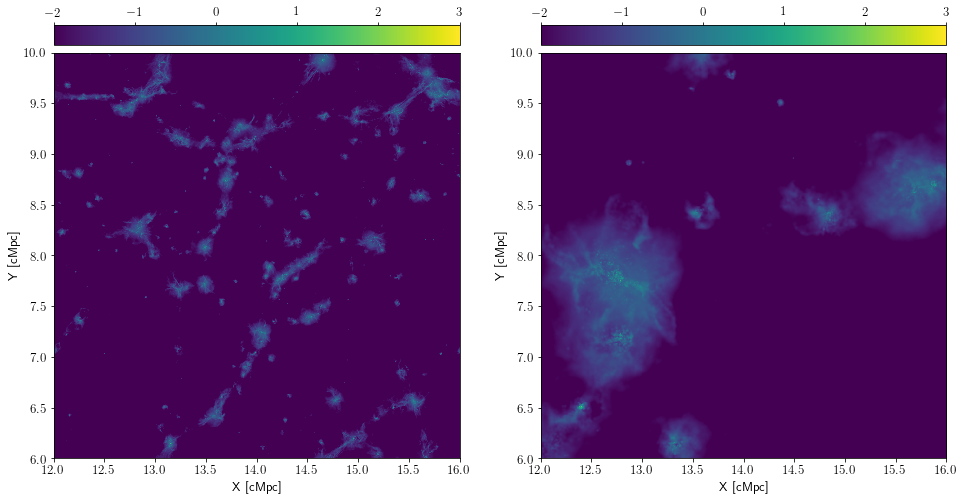

In [87]:
'0 to 5 K'
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,16))

Vmin=None; Vmax=None
Vmin=-2; Vmax=3
xystarts = [0,0]
xyextent = [25.,25.]

pltimg(halpha_logT0to5,ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel=r'')

pixsize = halpha_logT0to5.shape[0]; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]
subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(halpha_logT0to5[subset[0]:subset[1],subset[2]:subset[3]],
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel=r'')

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,16))

'all together'
pltimg(halpha_backup,ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel=r'')

pixsize = halpha_backup.shape[0]; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]
subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(halpha_backup[subset[0]:subset[1],subset[2]:subset[3]],
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel=r'')

'5 to 10 K'
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,16))

pltimg(halpha_logT5to10,ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel=r'')

pixsize = halpha_logT5to10.shape[0]; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]
subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(halpha_logT5to10[subset[0]:subset[1],subset[2]:subset[3]],
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,clabel=r'')